In [ ]:
import numpy as np
import pandas as pd

# Reorganizing Data in DataFrames

## Concatenation / Appends

The `pd.concat()` fucntion and `DataFrame.append()` method takes DataFrames with identical columns and makes a DataFrame that is **taller** than either of them by stacking them on top of each other.

For example, it can turn this `df1` DataFrame:

| Day | Weather |
| :-: | :---:   |
| Monday | Sunny   |
| Tuesday | Rainy |

and this `df2` DataFrame:

| Day | Weather |
| :-: | :---:   |
| Wednesday | Sunny   |
| Thursday | Rainy |

into this:

| Day | Weather |
| :-: | :---:   |
| Monday | Sunny   |
| Tuesday | Rainy |
| Wednesday | Sunny   |
| Thursday | Rainy |


with one line of code:

```python
pd.concat([df1, df2])
```

**Note:** If you'd like pandas to ignore the index of the dataframes when appending them, the following option is helpful:

```python
pd.concat([df1, df2], ignore_index=True)
```

**Note:** With the `pd.concat()` function, you can concatenate as many dataframes in one step as you want!

#### Exercise

Let's practice concatenating DataFrames with the `pd.concat` function:

In [ ]:
df1 = pd.DataFrame({'Name': ['Jackson', 'Josh', 'Jenny'], 'Age': [16, 19, 17]})
df1

,Name,Age
0,Jackson,16
1,Josh,19
2,Jenny,17


In [ ]:
df2 = pd.DataFrame({'Age': [21, 16, 23], 'Name': ['Jess', 'Jon', 'Joe'], 'Weight': [30, 33, 32]},  index=[3, 4, 5])
df2

,Age,Name,Weight
3,21,Jess,30
4,16,Jon,33
5,23,Joe,32


In [ ]:
df3 = pd.DataFrame({'Name': ['Jill', 'Josephine', 'Jack'], 'Age': [5, 10, 61]})
df3

,Name,Age
0,Jill,5
1,Josephine,10
2,Jack,61


Concatenate df1 and df2 together!

In [ ]:
pd.concat([df1, df2])

,Name,Age,Weight
0,Jackson,16,NaN
1,Josh,19,NaN
2,Jenny,17,NaN
3,Jess,21,30.0
4,Jon,16,33.0
5,Joe,23,32.0


Concatenate df2 and df3 together!

In [ ]:
dd = pd.concat([df2, df1], ignore_index=False)
dd

,Age,Name,Weight
3,21,Jess,30.0
4,16,Jon,33.0
5,23,Joe,32.0
0,16,Jackson,NaN
1,19,Josh,NaN
2,17,Jenny,NaN


In [ ]:
dd.loc[5]

Age         23
Name       Joe
Weight    32.0
Name: 5, dtype: object

Concatenate all three dataframes in a single line

In [ ]:
pd.concat([df2, df1, df3], ignore_index=True)

,Age,Name,Weight
0,21,Jess,30.0
1,16,Jon,33.0
2,23,Joe,32.0
3,16,Jackson,NaN
4,19,Josh,NaN
5,17,Jenny,NaN
6,5,Jill,NaN
7,10,Josephine,NaN
8,61,Jack,NaN


The index in these datasets is unlabelled, indicating that they potentially don't contain useful data.  Concatenate them all together so that the index of the final dataframe is simply 0-8.

## Merge / Joins
The `pd.merge()` function and `DataFrame.join()` method take two DataFrames and make them **wider** by matching rows with the same-values on a specified column.  

For example, it can turn this `df1` DataFrame:

| Day | Weather |
| :-: | :---:   |
| Monday | Sunny   |
| Tuesday | Rainy |

and this `df2` DataFrame:

| Day | Temperature |
| :-: | :---:   |
| Tuesday | 12   |
| Monday | 18 |

into this:

| Day | Weather | Temperature |
| :-: | :---:   | :---: |
| Monday | Sunny   | 18 |
| Tuesday | Rainy | 12 |

with one line of code:

```python
df_merged = pd.merge(left=df1, right=df2, left_on="Day", right_on="Day")
```

Just specify which columns should be matched up with each other, and it will search for the matching values automatically!  If you want it to use the index, you can alternatively supply the option `left_index=True` and/or `right_index=True`. 

### Exercises

Let's practice merging dataframes with the `pd.merge()` function.

Dataframe 1:

In [ ]:
df1 = pd.DataFrame({'Name': ['Paul', 'Arash', 'Jenny'], 'Age': [16, 19, 17]})
df1

,Name,Age
0,Paul,16
1,Arash,19
2,Jenny,17


Dataframe 2:

In [ ]:
df2 = pd.DataFrame({'Name': ['Arash', 'Paul', 'Sara'], 'Weight': [32, 15, 37]})
df2

,Name,Weight
0,Arash,32
1,Paul,15
2,Sara,37


Dataframe 3:

In [ ]:
df3 = pd.DataFrame({'Name': ['Amy', 'Paul', 'Sara'], 'Height': [170, 190, 143]})
df3

,Name,Height
0,Amy,170
1,Paul,190
2,Sara,143


Merge them together.  Who do we know both the name and weight of?

In [ ]:
pd.merge(df1, df2, left_on='Name', right_on='Name', how='right')

,Name,Age,Weight
0,Arash,19.0,32
1,Paul,16.0,15
2,Sara,NaN,37


Who do we know both the weight and height of?

Try merging all 3 by merging twice.  Who do we know everything about?

Note that the Names that weren't present in both dataframes dropped out of the final result.  If you'd like to keep them and have NaNs appear, you can change the `how` parameter in the `pd.merge()` function.  Let's try out a few options by merging dataframes 1 and 2:

`how="outer"`

`how="left"`

`how="right"`

`how="inner"`

Recognizing that multiple inner joins can result in high data attrition, what policies would you put in your future data analyses to both prevent data loss and keep data easy to analyze?

(text reply here)

## Regularizing, Splitting Text Data

Oftentimes, string data contains multiple pieces of data inside it, split with a seperator character (e.g. "_", ";", ",", etc).  Splitting a string around a seperator can done with the `pd.Sereis.str.split()` function.  With it, you can turn a DataFrame from this:

| line |
| :--: |
| hi_1 |
| bye_2|

into this:

| line | greeting | num |
| :--: | :--: | :--: |
| hi_1 | hi | 1 |
| bye_2| bye | 2 |

using a single line:

```python
df[['greeting', 'num']] = df['line'].str.split('_', expand=True)
```

Using the "apply-lambda" strategy is also quite useful for processing strings:

```python
df['Data'] = df['Data'].apply(lambda s: s.split('_')[0])  # Keep only the first string before the seperator
df['Data'] = df['Data'].apply(lambda s: s[:6])  # Keep only the first 6 characters
df.columns = df.columns.apply(lambda s: s.upper())  # upper-case all the column names
```


Let's try it out!

In [ ]:
df = pd.DataFrame({
    'counts_XADD': ["1;3;5", "10;2;6"],
    'intensities_JJAKX': ['5_32_654', "10_1_99"],
})
df

,counts_XADD,intensities_JJAKX
0,1;3;5,5_32_654
1,10;2;6,10_1_99


Rename the columns to just keep the the names befor ethe underscore

Split the Counts into Counts_1, Counts_2, and Counts_3

Split the Intensities into Intensities_1, Intensities_2, and Instensities_3

## Concatenating Across CSV Files Using Dask.DataFrame.read_csv()

The Dask DataFrame subpackage makes it possible to work on multiple files at once.  This is especially useful for performance on large datasets, but it also makes managing multiple files in general simple. Just use it like you would Pandas commands, and when you want Dask to make the DataFrame, run the `compute()` method:

To Load and Concatenate many CSV files:

```python
import dask.dataframe as dd
df = dd.read_csv("data/*.csv").compute()
```

Oftentimes, the filename contains metadata data we'd like to include in the analysis.  Dask can add the filename as its own column in the dataframe, for followup text processing:

```python
df = dd.read_csv("data/*.csv", include_path_column=True).compute()
```

### Exercise

Run the following code to create some data files: 

In [ ]:
from pathlib import Path
Path("peopledata").mkdir(exist_ok=True)
pd.DataFrame({'Name': ['Jackson', 'Josh', 'Jenny'], 'Age': [16, 19, 17]}).to_csv("peopledata/de_1.csv", index=False)
pd.DataFrame({'Name': ['Jess', 'Jon', 'Joe'], 'Age': [21, 16, 23]}, index=[3, 4, 5]).to_csv("peopledata/fr_2.csv", index=False)
pd.DataFrame({'Name': ['Jill', 'Josephine', 'Jack'], 'Age': [5, 10, 61]}).to_csv("peopledata/de_3.csv", index=False)

Read all of them in using Dask DataFrame, concatenate them together, and split the filenames into two columns:  "Country" and "GroupID"

## Melts

The `pd.melt()` function and `DataFrame.melt()` method take a single dataframe and make it **taller** by taking data stored in column names and putting it into the rows along with the rest of the data, adding extra metadata in the process.

For example, it can turn this `df` DataFrame:

| Month | Year | Monday | Tuesday | Wednesday |
| :--:  | :--: | :--:   | :--:    | :--:      |
| January | 2021 | 0 | -2 | -1 |
| February | 2021 | 2 | 4 | -2 |

into this:

| Month | Year | Weekday | Temperature |
| :--:  | :--: | :--:    |  :--:       |
| January | 2021 | Monday | 0 |
| January | 2021 | Tuesday | -2 |
| January | 2021 | Wednesday | -1 |
| February | 2021 | Monday | 2 |
| February | 2021 | Tuesday | 4 | 
| February | 2021 | Wednesday | -2 |

with one line of code:

```python
pd.melt(
    df, 
    id_vars=['Month', 'Year'],  # The columns that should stay the same
    value_vars=['Monday', 'Tuesday', 'Wednesday'],   # The columns that should melt
    var_name='Weekday',  # The new Column that will represent the melted column name's variable
    value_name='Temperature'  # The new Column that the data represents
)
```

**Note**: Melting a dataframe also called *"tidying"* data, making a *"long"* dataframe from a *"wide"* dataframe, or building a *design matrix*

#### Exercises

Let's practice tidying dataframes with the `pd.melt()` function.  In this dataset, the average speed and power for two different turbines on two different days are being compared.

In [ ]:
df = pd.DataFrame({
    'Turbine': ["CAPZB", "PRDX6"],
    'AvSpeed_1': [200, 220],
    'AvSpeed_2': [250, 160],
    'AvPower_1': [5.2, 2.8],
    'AvPower_2': [5.2, 4.6],
})
df

,Turbine,AvSpeed_1,AvSpeed_2,AvPower_1,AvPower_2
0,CAPZB,200,250,5.2,5.2
1,PRDX6,220,160,2.8,4.6


In [ ]:
dfl = pd.melt(df, id_vars=['Turbine'], value_vars=['AvSpeed_1', 'AvSpeed_2'], value_name='AvSpeed', var_name='Day')
dfl['Day'] = dfl['Day'].str.split('_', expand=True)[1].astype(int)
dfl

,Turbine,Day,AvSpeed
0,CAPZB,1,200
1,PRDX6,1,220
2,CAPZB,2,250
3,PRDX6,2,160


In [ ]:
dfl2 = pd.melt(df, id_vars=['Turbine'], value_vars=['AvPower_1', 'AvPower_2'], value_name='AvPower', var_name='Day')
dfl2['Day'] = dfl2['Day'].str.split('_', expand=True)[1].astype(int)
dfl2

,Turbine,Day,AvPower
0,CAPZB,1,5.2
1,PRDX6,1,2.8
2,CAPZB,2,5.2
3,PRDX6,2,4.6


In [ ]:
dfl3 = pd.merge(dfl, dfl2[['Day', 'AvPower']], on='Day')
dfl3

,Turbine,Day,AvSpeed,AvPower
0,CAPZB,1,200,5.2
1,CAPZB,1,200,2.8
2,PRDX6,1,220,5.2
3,PRDX6,1,220,2.8
4,CAPZB,2,250,5.2
5,CAPZB,2,250,4.6
6,PRDX6,2,160,5.2
7,PRDX6,2,160,4.6


In [ ]:
dfl4 = pd.melt(dfl3, id_vars=['Turbine', 'Day'], value_vars=['AvSpeed', 'AvPower'], value_name='Measurement', var_name='Metric')
dfl4

,Turbine,Day,Metric,Measurement
0,CAPZB,1,AvSpeed,200.0
1,CAPZB,1,AvSpeed,200.0
2,PRDX6,1,AvSpeed,220.0
3,PRDX6,1,AvSpeed,220.0
4,CAPZB,2,AvSpeed,250.0
5,CAPZB,2,AvSpeed,250.0
6,PRDX6,2,AvSpeed,160.0
7,PRDX6,2,AvSpeed,160.0
8,CAPZB,1,AvPower,5.2
9,CAPZB,1,AvPower,2.8


In [ ]:
import seaborn as sns

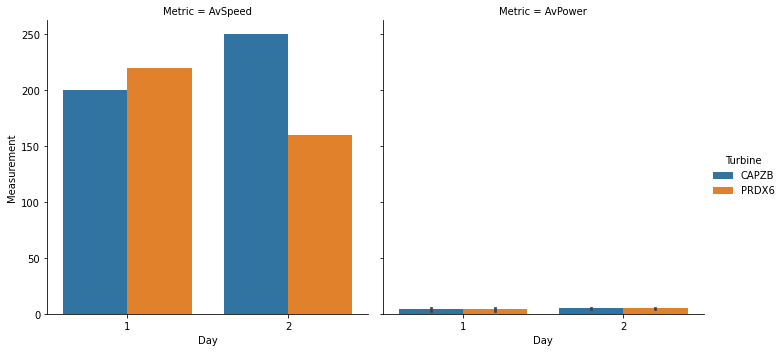

In [ ]:
sns.catplot(data=dfl4, x='Day', y='Measurement', hue='Turbine', col='Metric', kind='bar')

Melt the "AvSpeed_X" columns into two new columns: "AvSpeed" and "Day"

Melt the "AvPower_X" columns into two new columns: "AvPower" and "Day"

Merge the two melted dataframes you just made on the "Day" column

Melt the merged dataframe's "AvSpeed" and "AvPower" columns into two new columns: "Metric" and "Value"

## More out-of-core Reshaping Operations: Joins with SQL Queries

Does anyone in your group know some SQL?  You can write to and read from tables in any SQL database using the package sqlalchemy, as well as send custom queries!

| Function | Description |
| :---:    | :----:      |
| `create_engine()` | Describe how sqlalchemy should find and connect to your database |
| `engine.connect()` | Make an open connection to the database (similar to opening a file) |
| `DetaFrame.to_sql("table_name", conn)` | Write to a table in a database you have an open connection to |
| `pd.read_sql_table("table_name", conn)`, | Read from a table in a databae you have an open connection to |
| `pd.read_sql_query("SELECT * FROM table_name", conn)`, | Read from a query in a databae you have an open connection to |

In [ ]:
from sqlalchemy import create_engine

In [ ]:
# !pip install sqlalchemy

You should consider upgrading via the 'c:\users\503236363\desktop\at-s_pythontrainingseries\.venv\scripts\python.exe -m pip install --upgrade pip' command.


### Create and Population the Database

In [ ]:

with create_engine("sqlite:///people.db").connect() as conn:
    pd.DataFrame({'Name': ['Paul', 'Arash', 'Jenny'], 'Age': [16, 19, 17]}).to_sql("ages", conn, index=False)
    pd.DataFrame({'Name': ['Arash', 'Paul', 'Sara'], 'Weight': [32, 15, 37]}).to_sql("weights", conn, index=False)
    pd.DataFrame({'Name': ['Amy', 'Paul', 'Sara'], 'Height': [170, 190, 143]}).to_sql("heights", conn)

### Examples: Read from the Database

In [ ]:
with create_engine("sqlite:///people.db").connect() as conn:
    df = pd.read_sql_table("ages", conn)
df

,Name,Age
0,Paul,16
1,Arash,19
2,Jenny,17


In [ ]:
query = """
SELECT Age FROM ages
"""
with create_engine("sqlite:///people.db").connect() as conn:
    df = pd.read_sql_query(query, conn)
df

,Age
0,16
1,19
2,17


### Free Exercise

What kinds of queries can we make on this data?

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a0b87bd1-b327-49a5-9ccb-1e15aa1cbe83' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>